In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

plt.rcParams.update({'font.size':16})

In [2]:
from PyConstants import Constants
data_cosmo = np.loadtxt("../data/cosmology.txt")
N = data_cosmo.shape[0]

x_cosmo = data_cosmo[:,0]
eta_of_x = data_cosmo[:,1]/Constants.Mpc/Constants.km     # Eta(x) in Gpc
eta_of_x_Mpc = eta_of_x*1000
Hp_of_x_SI = data_cosmo[:,2]                              # aH(x) in SI
Hp_of_x = Hp_of_x_SI/Constants.km*Constants.Mpc     # aH(x) in km/s/Mpc
Hp_of_x_Mpc = Hp_of_x/(Constants.c/1000)
H_of_x_SI = Hp_of_x_SI/np.exp(x_cosmo)                    # H(x) in SI  
H_of_x = Hp_of_x/np.exp(x_cosmo)                          # H(x) in km/s/Mpc
dHpdx_of_x_SI = data_cosmo[:,3]
ddHpddx_of_x_SI = data_cosmo[:,10]
dHpdx_of_x = dHpdx_of_x_SI/Constants.km*Constants.Mpc
ddHpddx_of_x = ddHpddx_of_x_SI/Constants.km*Constants.Mpc
OmegaB = data_cosmo[:,4]
OmegaCDM = data_cosmo[:,5]
OmegaLambda = data_cosmo[:,6]
OmegaR = data_cosmo[:,7]

rad_mat_equal_idx = np.argmin(np.abs(OmegaR[N//4:3*N//4]-(OmegaCDM[N//4:3*N//4]+OmegaB[N//4:3*N//4]))) + N//4
DE_mat_equal_idx = np.argmin(np.abs(OmegaLambda[N//2:]-(OmegaCDM[N//2:]+OmegaB[N//2:]))) + N//2

x_rad_mat_equal = x_cosmo[rad_mat_equal_idx]
x_DE_mat_eqaul = x_cosmo[DE_mat_equal_idx]

In [3]:
data_rec = np.loadtxt("../data/recombination.txt")

x = data_rec[:,0]
Xe    = data_rec[:,1]

rec_idx = np.argmin(np.abs(Xe - 0.99))
x_rec = x[rec_idx]

In [86]:
k_vals = [0.001, 0.01, 0.1, 1.0]

data = []
for k in k_vals:
    data.append(np.loadtxt(f"../data/perturbations_k{k}.txt"))
data = np.array(data)

x          = data[0,:,0]
delta_cdm  = data[:,:,1]
delta_b    = data[:,:,2]
v_cdm      = data[:,:,3]
v_b        = data[:,:,4]
Theta0     = data[:,:,5]
Theta1     = data[:,:,6]
Theta2     = data[:,:,7]
Theta3     = data[:,:,8]
Phi        = data[:,:,9]
Psi        = data[:,:,10]
Pi         = data[:,:,11]
source     = data[:,:,12]

delta_gamma = 4*Theta0
v_gamma     = -3*Theta1

Delta_cdm[0] = delta_cdm[0] - 3*Hp_of_x_SI[:8000]/(Constants.c*1/Constants.Mpc)*v_cdm[0]
Delta_cdm[3] = delta_cdm[3] - 3*Hp_of_x_SI[:8000]/(Constants.c*1/Constants.Mpc)*v_cdm[3]

data.shape

(4, 8000, 16)

In [5]:
x_horizon_1 = x_cosmo[np.argmin(np.abs(eta_of_x_Mpc - 1/1.0))]
x_horizon_01 = x_cosmo[np.argmin(np.abs(eta_of_x_Mpc - 1/0.1))]
x_horizon_001 = x_cosmo[np.argmin(np.abs(eta_of_x_Mpc - 1/0.01))]
x_horizon_0001 = x_cosmo[np.argmin(np.abs(eta_of_x_Mpc - 1/0.001))]
x_horizon_1, x_horizon_01, x_horizon_001, x_horizon_0001

(-13.3077, -10.9855, -8.50325, -5.23292)

In [6]:
x_Hp_1 = x_cosmo[np.argmin(np.abs(Hp_of_x_Mpc - 1/1.0))]
x_Hp_1

-13.3057

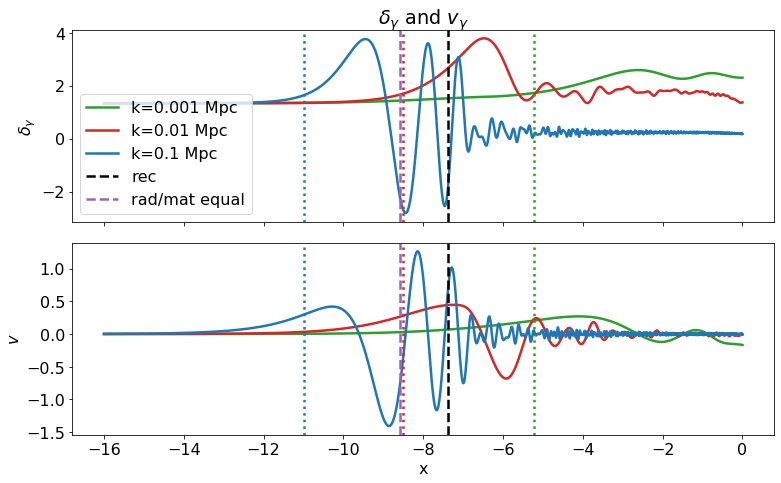

In [56]:
colors = ["tab:green", "tab:red", "tab:blue", "tab:cyan"]

fig, ax = plt.subplots(2, 1, figsize=(11, 7), sharex=True)
for i in range(3):
    k = k_vals[i]
    ax[0].plot(x, delta_gamma[i], c=colors[i], label=f"k={k} Mpc", lw=2.5)
    ax[1].plot(x, v_gamma[i], c=colors[i], lw=2.5)

ax[1].set_xlabel("x")
ax[0].set_ylabel("$\delta_\gamma$")
ax[1].set_ylabel("$v$")
ax[0].set_title("$\delta_\gamma$ and $v_\gamma$")
for j in range(2):
    ax[j].axvline(x=x_rec, ls="--", c="k", label="rec", lw=2.5)
    ax[j].axvline(x=x_rad_mat_equal, ls="--", c="tab:purple", label="rad/mat equal", lw=2.5)
    ax[j].axvline(x=x_horizon_0001, ls=":", c=colors[0], lw=2.5)
    ax[j].axvline(x=x_horizon_001, ls=":", c=colors[1], lw=2.5)
    ax[j].axvline(x=x_horizon_01, ls=":", c=colors[2], lw=2.5)
        
ax[0].legend(loc=3)
fig.tight_layout();
plt.savefig("../m3_figs/thetas.png", bbox_inches="tight")

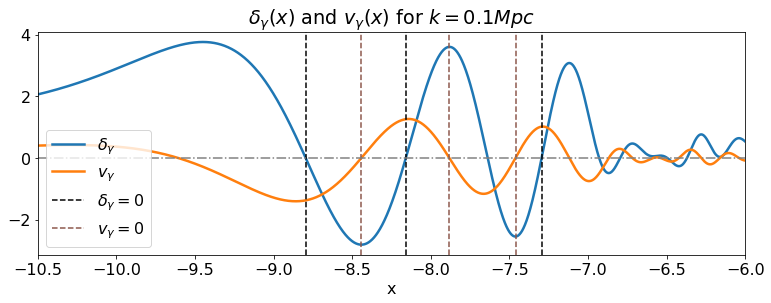

In [57]:
plt.rcParams.update({'font.size':16})
plt.figure(figsize=(11, 4.5))
plt.plot(x, delta_gamma[2], c="tab:blue", lw=2.5, label="$\delta_\gamma$")
plt.plot(x, v_gamma[2], c="tab:orange", lw=2.5, label="$v_\gamma$")
plt.xlim(-10.5, -6)
plt.axvline(x=x[np.argwhere(np.abs(delta_gamma[2]) < 0.01)[0]], ls="--", c="k")
plt.axvline(x=x[np.argwhere((np.abs(delta_gamma[2]) < 0.01)*(x > -8.5))[0]], ls="--", c="k")
plt.axvline(x=x[np.argwhere((np.abs(delta_gamma[2]) < 0.01)*(x > -8))[0]], ls="--", c="k", label="$\delta_\gamma=0$")
plt.axvline(x=x[np.argwhere((np.abs(v_gamma[2]) < 0.01)*(x > -9))[0]], ls="--", c="tab:brown")
plt.axvline(x=x[np.argwhere((np.abs(v_gamma[2]) < 0.01)*(x > -8))[0]], ls="--", c="tab:brown")
plt.axvline(x=x[np.argwhere((np.abs(v_gamma[2]) < 0.01)*(x > -7.5))[0]], ls="--", c="tab:brown", label="$v_\gamma=0$")
plt.axhline(y=0, ls="-.", lw=1.5, c="gray")
plt.xlabel("x");
plt.ylabel("")
plt.title("$\delta_\gamma(x)$ and $v_\gamma(x)$ for $k=0.1 Mpc$")
plt.legend();
plt.tight_layout()
plt.savefig("../m3_figs/Theta0_zoomed.png", bbox_inches="tight");

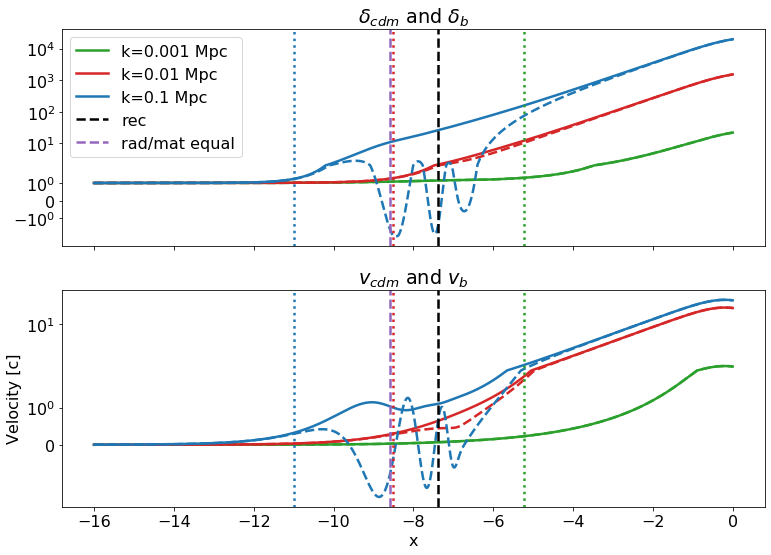

In [60]:
fig, ax = plt.subplots(2, 1, figsize=(11, 8), sharex=True)
for i in range(3):
    k = k_vals[i]
    ax[0].semilogy(x, delta_cdm[i], c=colors[i], label=f"k={k} Mpc", lw=2.5)
    ax[0].semilogy(x, delta_b[i], c=colors[i], ls="--", lw=2.5)
    ax[0].set_yscale('symlog')
    ax[0].set_title("$\delta_{cdm}$ and $\delta_b$")
    
    ax[1].semilogy(x, v_cdm[i], c=colors[i], lw=2.5)
    ax[1].semilogy(x, v_b[i], c=colors[i], ls="--", lw=2.5)
    ax[1].set_yscale('symlog')
    ax[1].set_title("$v_{cdm}$ and $v_b$")    
    
for i in range(2):
    ax[i].axvline(x=x_rec, ls="--", c="k", label="rec", lw=2.5)
    ax[i].axvline(x=x_rad_mat_equal, ls="--", c="tab:purple", label="rad/mat equal", lw=2.5)
    ax[i].axvline(x=x_horizon_0001, ls=":", c=colors[0], lw=2.5)
    ax[i].axvline(x=x_horizon_001, ls=":", c=colors[1], lw=2.5)
    ax[i].axvline(x=x_horizon_01, ls=":", c=colors[2], lw=2.5)

#custom_lines = [Line2D([0], [0], color="k", lw=2.5, ls=":")]
ax[1].set_xlabel("x")
ax[1].set_ylabel(f"Velocity [c]")
ax[0].legend()
#ax[1].legend(custom_lines, ["Horizon\nEntries"])
fig.tight_layout();
plt.savefig("../m3_figs/delta_and_v.png", bbox_inches="tight")

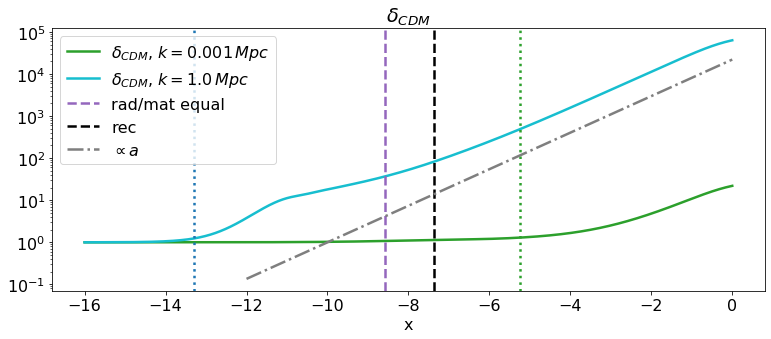

In [89]:
plt.figure(figsize=(11, 5))
plt.semilogy(x, delta_cdm[0], lw=2.5, c=colors[0], label="$\delta_{CDM}$, $k=0.001\, Mpc$")
plt.semilogy(x, delta_cdm[3], lw=2.5, c=colors[3], label="$\delta_{CDM}$, $k=1.0\, Mpc$")
plt.axvline(x=x_horizon_1, ls=":", c="tab:blue", lw=2.5)
plt.axvline(x=x_horizon_0001, ls=":", c="tab:green", lw=2.5)
plt.axvline(x=x_rad_mat_equal, ls="--", c="tab:purple", lw=2.5, label="rad/mat equal")
plt.axvline(x=x_rec, ls="--", lw=2.5, c="k", label="rec")
plt.title("$\delta_{CDM}$")
plt.plot([-12, 0], [np.exp(-2), np.exp(10)], ls="-.", c="tab:gray", lw=2.5, label="$\propto a$")
plt.xlabel("x")
plt.legend(loc=0);
plt.tight_layout()
plt.savefig("../m3_figs/delta_and_v_zoomed.png", bbox_inches="tight");

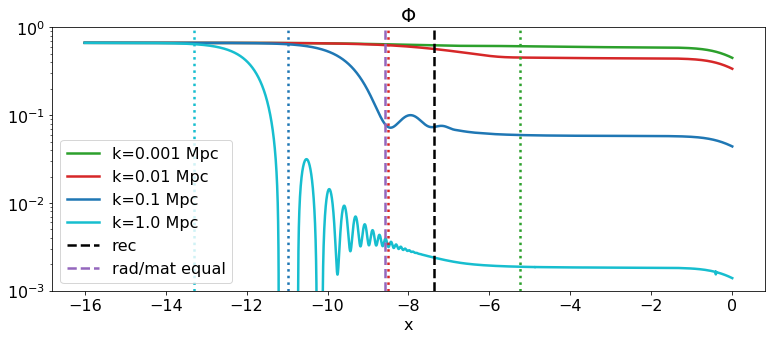

In [70]:
fig, ax = plt.subplots(1, figsize=(11, 5))
for i in range(4):
    k = k_vals[i]
    ax.semilogy(x, Phi[i], c=colors[i], label=f"k={k} Mpc", lw=2.5)
    ax.set_title("$\Phi$")
#for i in range(2):
#    for j in range(2):
ax.set_xlabel("x")
ax.axvline(x=x_rec, ls="--", c="k", label="rec", lw=2.5)
ax.axvline(x=x_rad_mat_equal, ls="--", c="tab:purple", label="rad/mat equal", lw=2.5)
ax.axvline(x=x_horizon_0001, ls=":", c=colors[0], lw=2.5)
ax.axvline(x=x_horizon_001, ls=":", c=colors[1], lw=2.5)
ax.axvline(x=x_horizon_01, ls=":", c=colors[2], lw=2.5)
ax.axvline(x=x_horizon_1, ls=":", c=colors[3], lw=2.5)

ax.legend()
plt.xticks()
plt.ylim(1e-3, 1.0)
fig.tight_layout();
plt.savefig("../m3_figs/Phi.png", bbox_inches="tight")

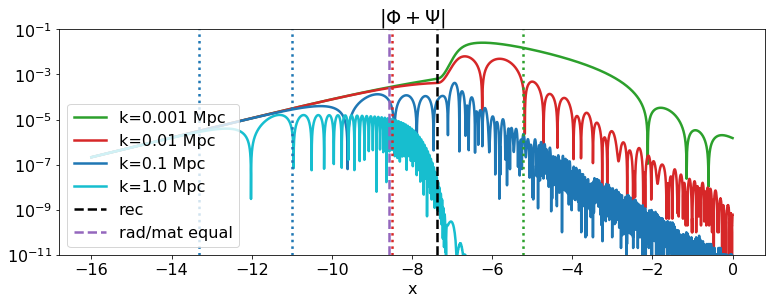

In [78]:
fig, ax = plt.subplots(1, figsize=(11, 4.5))
for i in range(4):
    k = k_vals[i]
    ax.semilogy(x, np.abs(Phi[i] + Psi[i]), c=colors[i], label=f"k={k} Mpc", lw=2.5)
ax.set_title("$|\Phi + \Psi$|")
ax.set_xlabel("x")
ax.axvline(x=x_rec, ls="--", c="k", label="rec", lw=2.5)
ax.axvline(x=x_rad_mat_equal, ls="--", c="tab:purple", label="rad/mat equal", lw=2.5)
ax.axvline(x=x_horizon_0001, ls=":", c=colors[0], lw=2.5)
ax.axvline(x=x_horizon_001, ls=":", c=colors[1], lw=2.5)
ax.axvline(x=x_horizon_01, ls=":", c=colors[2], lw=2.5)
ax.axvline(x=x_horizon_1, ls=":", c=colors[2], lw=2.5)
ax.legend(loc=3)
ax.set_ylim(1e-11, 1e-1)
fig.tight_layout();
plt.savefig("../m3_figs/Psi_plus_Phi.png", bbox_inches="tight")

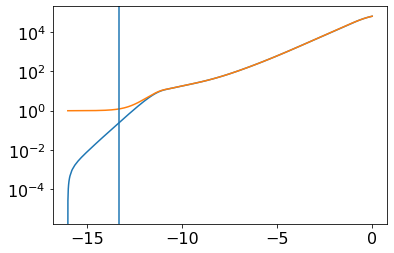

In [82]:
#plt.semilogy(x, delta_cdm[0] - 3*Hp_of_x_SI[:8000]/(Constants.c*0.001)*v_cdm[0])
#plt.semilogy(x, delta_cdm[1] - 3*Hp_of_x_SI[:8000]/(Constants.c*0.01)*v_cdm[1])
#plt.semilogy(x, delta_cdm[2] - 3*Hp_of_x_SI[:8000]/(Constants.c*0.1)*v_cdm[2])
plt.semilogy(x, Delta_cdm[3])
plt.semilogy(x, delta_cdm[3])
plt.axvline(x=x_horizon_1)

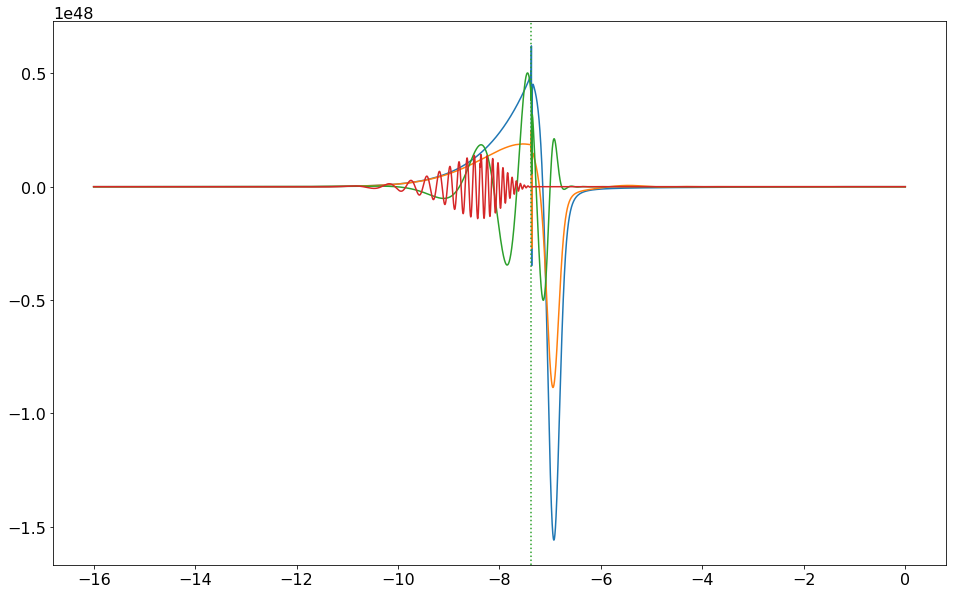

In [14]:
plt.figure(figsize=(16, 10))
plt.plot(x, source[0])
plt.plot(x, source[1])
plt.plot(x, source[2])
plt.plot(x, source[3])
plt.axvline(x=x_rec, ls=":", c="tab:green")

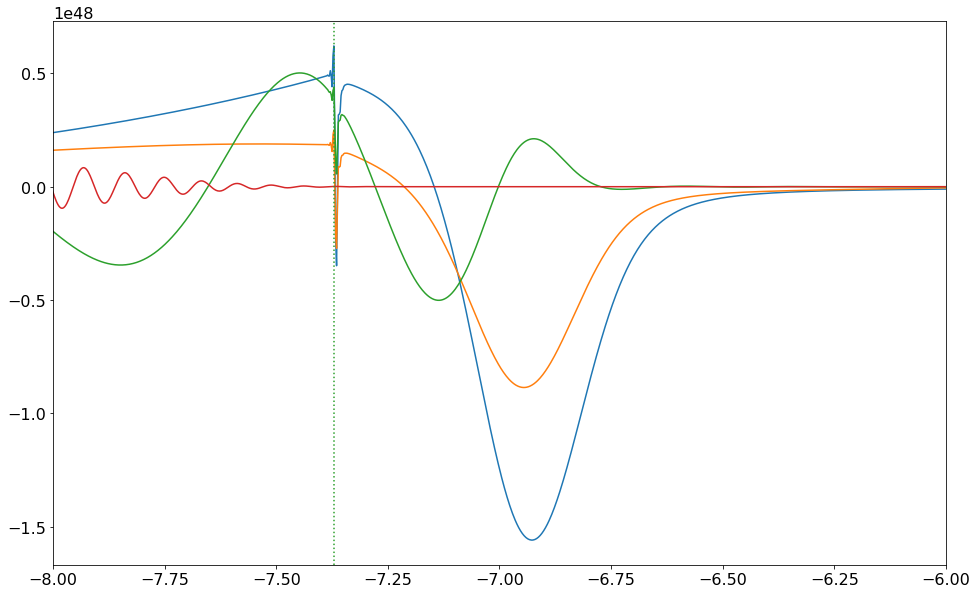

In [15]:
plt.figure(figsize=(16, 10))
plt.plot(x, source[0])
plt.plot(x, source[1])
plt.plot(x, source[2])
plt.plot(x, source[3])
plt.xlim(-8, -6)
plt.axvline(x=x_rec, ls=":", c="tab:green")